In [1]:
# QUESTIONS:

# did all groups use the same target region area?

# Make Functions for plotting routine -> one notebook for all regions



In [2]:
#### Necessary libraries ####

import numpy as np  # Numpy is the fundamental package for scientific computing in Python.
import pandas as pd
from Functions import *
import pylab
from combine_data import read_data, read_precip_era5, read_tracked_precip
from paths import basedir, figure_path

# The statement below enforces the plots to be put into this notebook, instead of in their own windows.
%matplotlib inline

In [3]:
# ----------------------------------------
# Figure settings
# ----------------------------------------
small = 18
font = {"weight": "normal", "size": small}
pylab.rc("font", **font)
pylab.rcParams["figure.figsize"] = (15.0, 10.0)
pylab.rcParams["xtick.major.pad"] = "10"
pylab.rcParams["ytick.major.pad"] = "15"
ms = 10

# Data loading

In [4]:
########################################################
## INPUT soecifications ###
########################################################
case = "Pakistan"

########################################################
## import model runs                                  ##
########################################################
ds_sources = read_data(basedir, case)

########################################################
## WRF-WVT                                            ##
########################################################
# Just csv file because of nature of simulations #
csv_wrf_wvt = pd.read_csv(
    basedir + "/" + case + "/results WRF-WVT/" + case + "Case_Final.csv",
    sep=";",
    decimal=",",
    index_col=0,
)

########################################################
## Precipitation ERA5                                 ##
########################################################
precip_era5 = read_precip_era5(
    basedir, case
)  # ,exclude=['results Ru_Xu_FLEXPART']) #,'results TRACMASS Dipanjan Dey'])

########################################################
## Precipitation Estimate                              ##
########################################################
precip_estimate = read_tracked_precip(basedir, case)

Loading WRF-WVT data for Pakistan
Loading wam2layers data for Pakistan


Loading 2ldrm data for Pakistan
Loading utrack data for Pakistan


Loading btrims data for Pakistan
Loading tracmass data for Pakistan
Loading ughent data for Pakistan


Loading UIB data for Pakistan
Loading UniVie data for Pakistan


Loading CHc data for Pakistan
Loading xu data for Pakistan
Loading tatfancheng data for Pakistan
Loading uvigo data for Pakistan
results 2LDRM
results FLEXPART_WaterSip_TatFanCheng
results UGhent HAMSTER
results Utrack Arie Staal
results WRF-WVT
results B-TrIMS
results Ru_Xu_FLEXPART
results UiB FLEXPART WaterSip


results Uvigo
results CHc LAGRANTO
results TRACMASS Dipanjan Dey
results univie FLEXPART
results WAM2layers


results 2LDRM
results FLEXPART_WaterSip_TatFanCheng
results UGhent HAMSTER
results Utrack Arie Staal
results WRF-WVT
results B-TrIMS
results Ru_Xu_FLEXPART
results UiB FLEXPART WaterSip
results Uvigo
results CHc LAGRANTO
results TRACMASS Dipanjan Dey
results univie FLEXPART
results WAM2layers


# Calculate sum of moisture sources

In [5]:
#### model runs for plotting ####


# TODO: fix WAM2layers units (?)
list_reordered = [
    "WAM2layers",
    "2LDRM",
    #'UTrack Ens1',
    "UTrack Ens2",
    #'UTrack Ens3',
    #'UTrack Ens4',
    #'UTrack Ens5',
    "B-TrIMS",
    "TRACMASS",
    #'FLEXPART-HAMSTER Ens1',
    #'FLEXPART-HAMSTER Ens2',
    #'FLEXPART-HAMSTER Ens3',
    #'FLEXPART-HAMSTER Ens4',
    "FLEXPART-HAMSTER Ens5",
    "FLEXPART-WaterSip (UiB)",
    "FLEXPART-WaterSip (UniVie)",
    "LAGRANTO-WaterSip (CHc)",
    "FLEXPART-WaterSip (IBCAS)",
    "FLEXPART-WaterSip (HKUST) Ens2",
    "FLEXPART-WaterSip (LATTIN, UVigo)",
    #'WRF-WVT',
    "FLEXPART-Stohl&James",
]

all_maps = {kk: ds_sources[kk] for kk in list_reordered}
all_maps = xr.Dataset(all_maps)

In [6]:
#### region attribution ####
all_maps_frac_regional, all_maps_regional, source_sums = calculate_region_attr(
    all_maps, csv_wrf_wvt, case, basedir
)

/home/peter/wam2layers/Moisture_tracking_intercomparison/Functions.py:206: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [csv_wrf_wvt.loc["2022-08-10_2022-08-25"][0]],


# Table of estimated precipitation

In [7]:
modelnames = np.concatenate([list_reordered[:-1], ["WRF_WVT"], [list_reordered[-1]]])
pr_sums = np.zeros(source_sums.shape)

if case == "Pakistan":
    length = 15 * 24
elif case == "Scotland":
    length = 3 * 24
elif case == "Australia":
    length = 7 * 24

for ii, mname in enumerate(modelnames):
    part = 0
    if mname in precip_estimate:
        if mname == "UTrack Ens2":
            pr_sum = precip_estimate[mname][:length].sum().values
        else:
            pr_sum = precip_estimate[mname].sum().values
        if (mname == "FLEXPART-LATTIN (UVigo)") or (mname == "FLEXPART-Stohl&James"):
            if case == "Pakistan":
                nrpoints = 352  ##THESE VALUES SHOULD BE CHECKED!!##
            elif case == "Scotland":
                nrpoints = 899
            elif case == "Australia":
                nrpoints = 1517
            pr_sum = (
                np.sum(np.array(precip_estimate[mname][mname], dtype="f")) / nrpoints
            )
    pr_sums[ii] = pr_sum

# Save into data frame
df = pd.DataFrame(
    {
        "Method name": modelnames,
        "Precipitation_estimate": pr_sums,
        "Sum of moisture sources": source_sums,
    }
)

## Print as latex table
print(
    df.to_latex(
        index=False,
        formatters={"name": str.upper},
        float_format="{:.1f}".format,
    )
)

\begin{tabular}{lrr}
\toprule
Method name & Precipitation_estimate & Sum of moisture sources \\
\midrule
WAM2layers & 239.6 & 233.9 \\
2LDRM & 240.8 & 185.6 \\
UTrack Ens2 & 234.7 & 210.7 \\
B-TrIMS & 237.9 & 212.8 \\
TRACMASS & 227.6 & 244.0 \\
FLEXPART-HAMSTER Ens5 & 240.0 & 240.0 \\
FLEXPART-WaterSip (UiB) & 209.6 & 248.4 \\
FLEXPART-WaterSip (UniVie) & 276.0 & 232.2 \\
LAGRANTO-WaterSip (CHc) & 227.3 & 224.9 \\
FLEXPART-WaterSip (IBCAS) & 223.4 & 197.7 \\
FLEXPART-WaterSip (HKUST) Ens2 & 205.4 & 202.6 \\
FLEXPART-WaterSip (LATTIN, UVigo) & 205.4 & 331.5 \\
WRF_WVT & 195.8 & 195.8 \\
FLEXPART-Stohl&James & 195.8 & 662.6 \\
\bottomrule
\end{tabular}



# Plotting ERA5 precipitation

In [8]:
#### PLOTTING precipitation time series ####
# plot_precip(precip_era5,case,figure_path,False)


# Plotting total/tracked precipitation

/tmp/ipykernel_453668/1383949706.py:42: RuntimeWarning: divide by zero encountered in divide
  part = source_sums[ii] / pr_sum
/tmp/ipykernel_453668/1383949706.py:46: RuntimeWarning: divide by zero encountered in divide
  "{:.0f}".format(source_sums[ii] / pr_sum * 100) + "%",
/tmp/ipykernel_453668/1383949706.py:42: RuntimeWarning: divide by zero encountered in divide
  part = source_sums[ii] / pr_sum
/tmp/ipykernel_453668/1383949706.py:46: RuntimeWarning: divide by zero encountered in divide
  "{:.0f}".format(source_sums[ii] / pr_sum * 100) + "%",


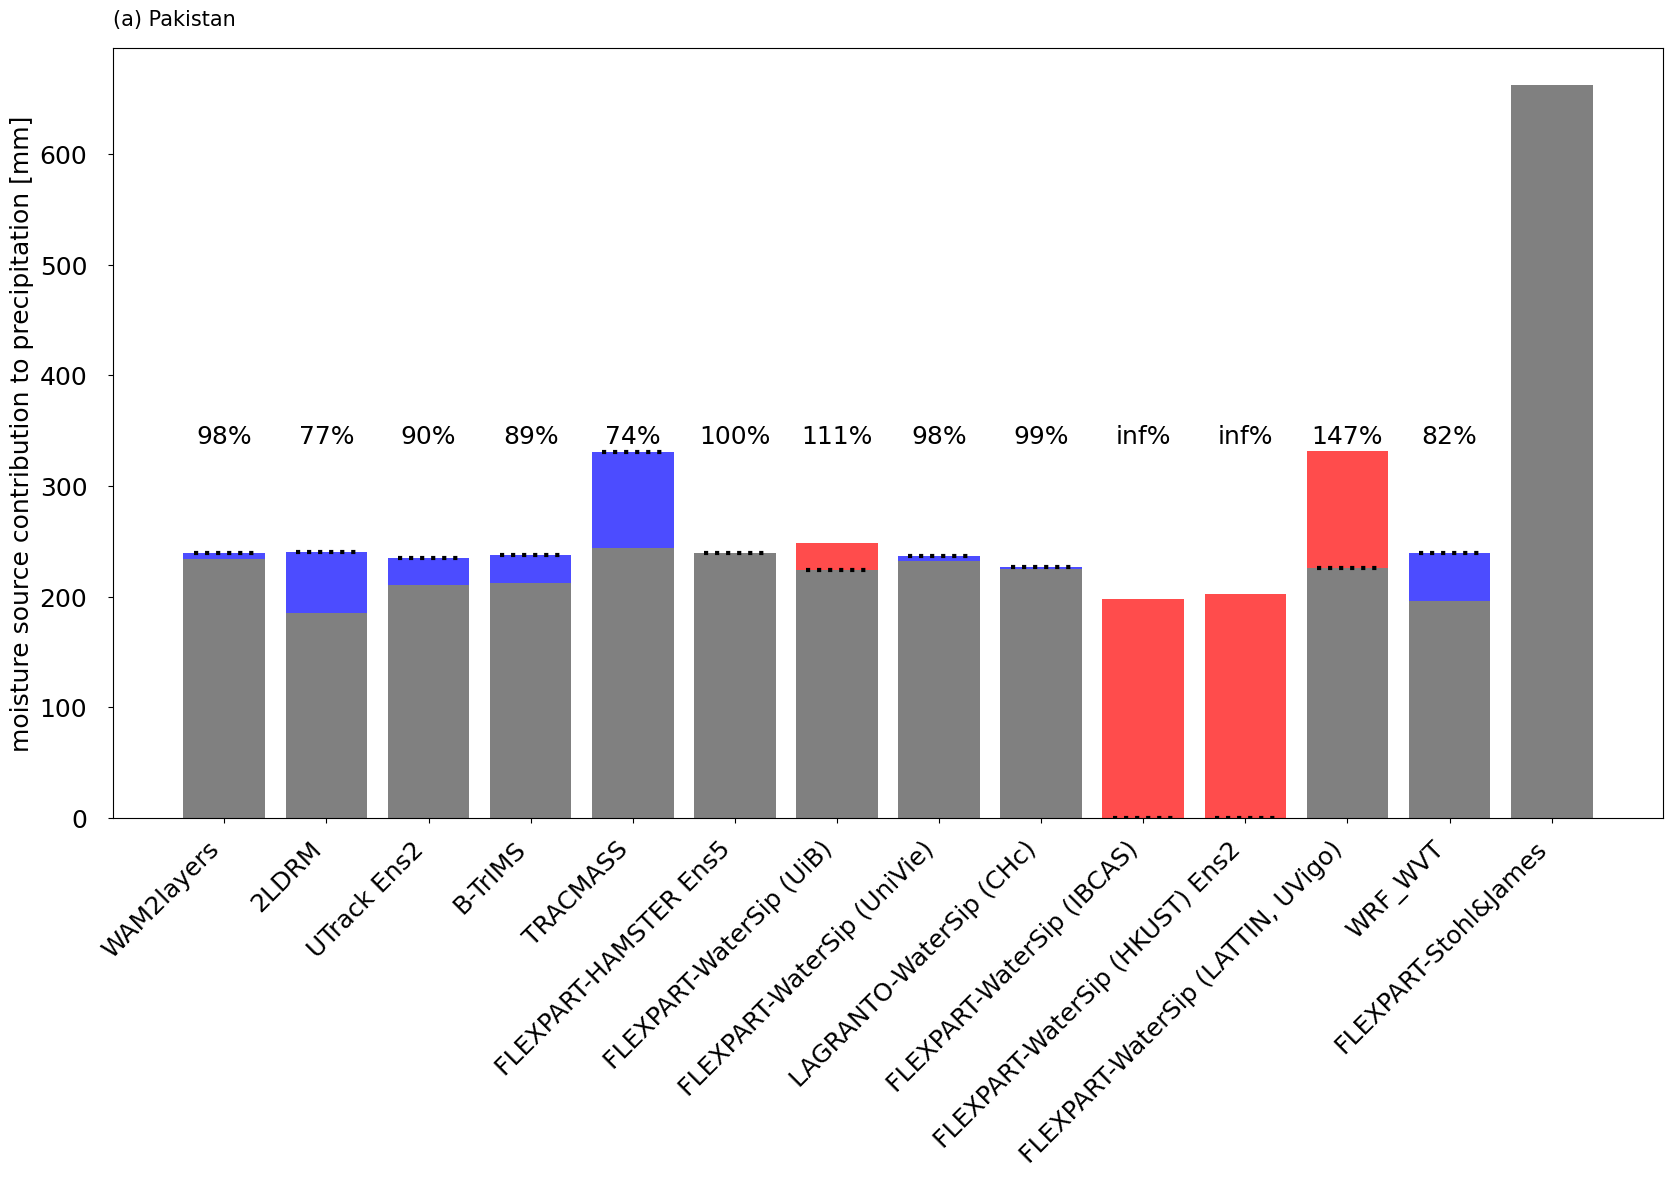

In [9]:
fig, ax = plt.subplots(figsize=(20, 10))

if case == "Pakistan":
    texty = 338
    ylimx = 350
    leg2h = 0.54
    length = 15 * 24
    letter = "(a)"
elif case == "Scotland":
    texty = 41
    ylimx = 42.5
    leg2h = 0.71
    length = 3 * 24
    letter = "(c)"
elif case == "Australia":
    texty = 156
    ylimx = 162
    leg2h = 0.6
    length = 7 * 24
    letter = "(b)"

#### preparing arrays to plot ####

srcs_wrf_wvt = all_maps_regional["FLEXPART-Stohl&James"].copy()
if case == "Pakistan":
    srcs_wrf_wvt.values = csv_wrf_wvt.loc["2022-08-10_2022-08-25"][1:-2].values
elif case == "Scotland":
    srcs_wrf_wvt.values = csv_wrf_wvt.loc["2023-10-06_2023-10-09"][1:-2].values
elif case == "Australia":
    srcs_wrf_wvt.values = csv_wrf_wvt.loc["2022-02-22_2022-02-28"][1:-2].values

modelnames = np.concatenate([list_reordered[:-1], ["WRF_WVT"], [list_reordered[-1]]])
pr_sums = np.zeros(source_sums.shape)
for ii, mname in enumerate(modelnames):
    part = 0
    if mname in precip_era5:
        if mname == "UTrack Ens2":
            pr_sum = precip_era5[mname][:length].sum().values
        else:
            pr_sum = precip_era5[mname].sum().values
        ax.hlines(pr_sum, ii - 0.3, ii + 0.3, color="k", linestyle=":", linewidth=3.0)
        part = source_sums[ii] / pr_sum
        ax.text(
            ii,
            texty,
            "{:.0f}".format(source_sums[ii] / pr_sum * 100) + "%",
            ha="center",
        )

    if part > 1:
        colorm = "r"
        plt.bar(ii, pr_sum, color="grey")
        plt.bar(ii, source_sums[ii] - pr_sum, color=colorm, bottom=pr_sum, alpha=0.7)
        # plt.bar(ii,pr_sum,color='k')

    elif part == 0:
        colorm = "grey"
        plt.bar(ii, source_sums[ii], color=colorm)

    else:
        colorm = "b"
        plt.bar(ii, source_sums[ii], color="grey")
        plt.bar(
            ii,
            pr_sum - source_sums[ii],
            color=colorm,
            bottom=source_sums[ii],
            alpha=0.7,
        )
    pr_sums[ii] = pr_sum

ax.set_xticks(range(len(modelnames)))
ax.set_xticklabels(modelnames, rotation=45, ha="right")
ax.set_ylabel("moisture source contribution to precipitation [mm]")
plt.text(
    0,
    1.05,
    f"{letter} {case}",
    transform=ax.transAxes,
    va="top",
    ha="left",
    fontsize=15,
)


plt.savefig(
    figure_path + "Figure7_bar_plots_frac_simple_" + case + ".png",
    bbox_inches="tight",
    dpi=600,
)

# Plotting (regional) attributions

/home/peter/wam2layers/Moisture_tracking_intercomparison/Functions.py:909: RuntimeWarning: divide by zero encountered in divide
  "{:.0f}".format(precip_sums[nn] / pr_sum * 100) + "%",
/home/peter/wam2layers/Moisture_tracking_intercomparison/Functions.py:909: RuntimeWarning: divide by zero encountered in divide
  "{:.0f}".format(precip_sums[nn] / pr_sum * 100) + "%",
/home/peter/wam2layers/Moisture_tracking_intercomparison/Functions.py:941: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(bbox_to_anchor=(1.3, leg2h), fontsize=16, frameon=False)


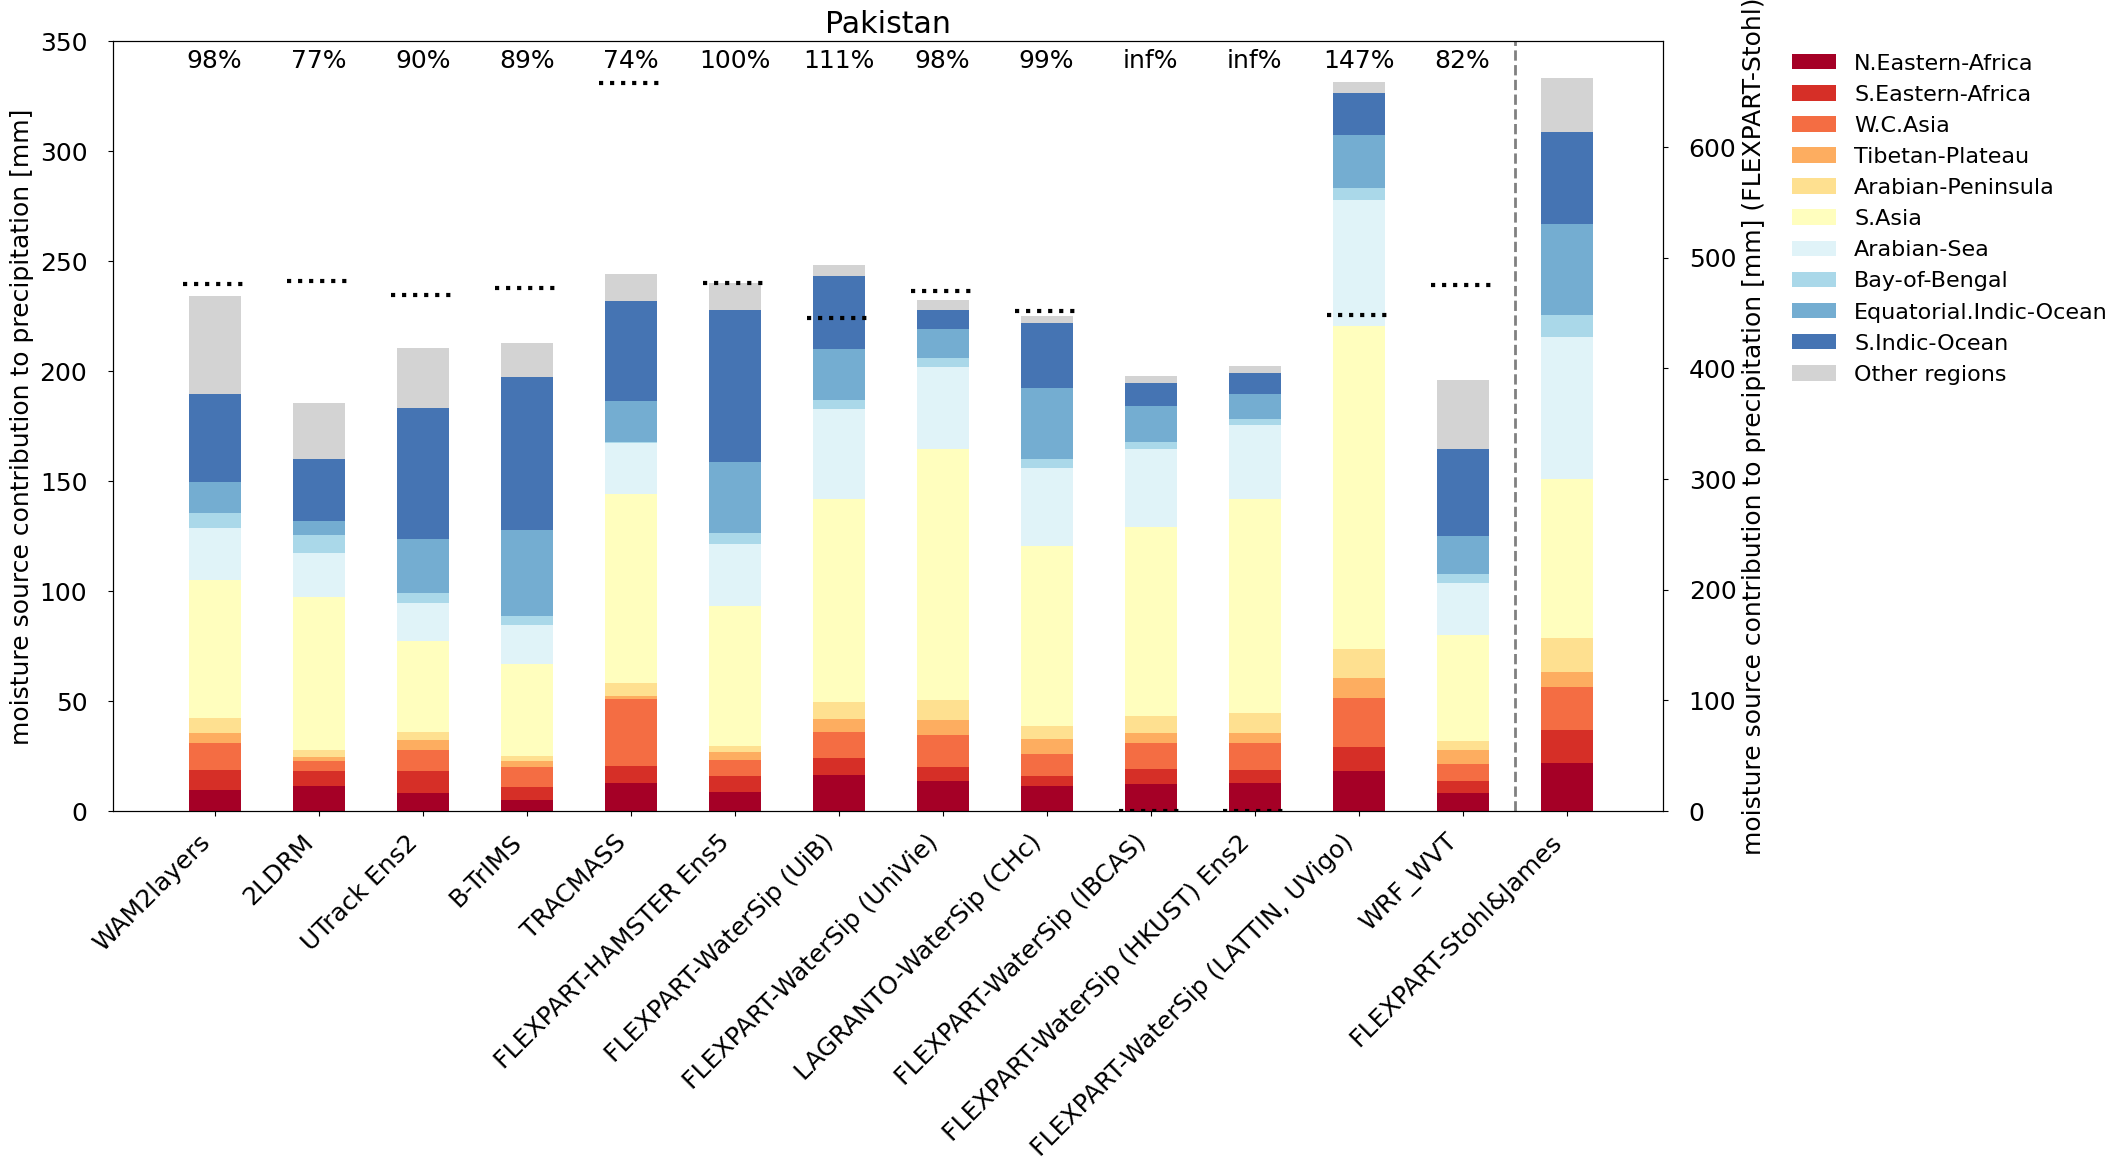

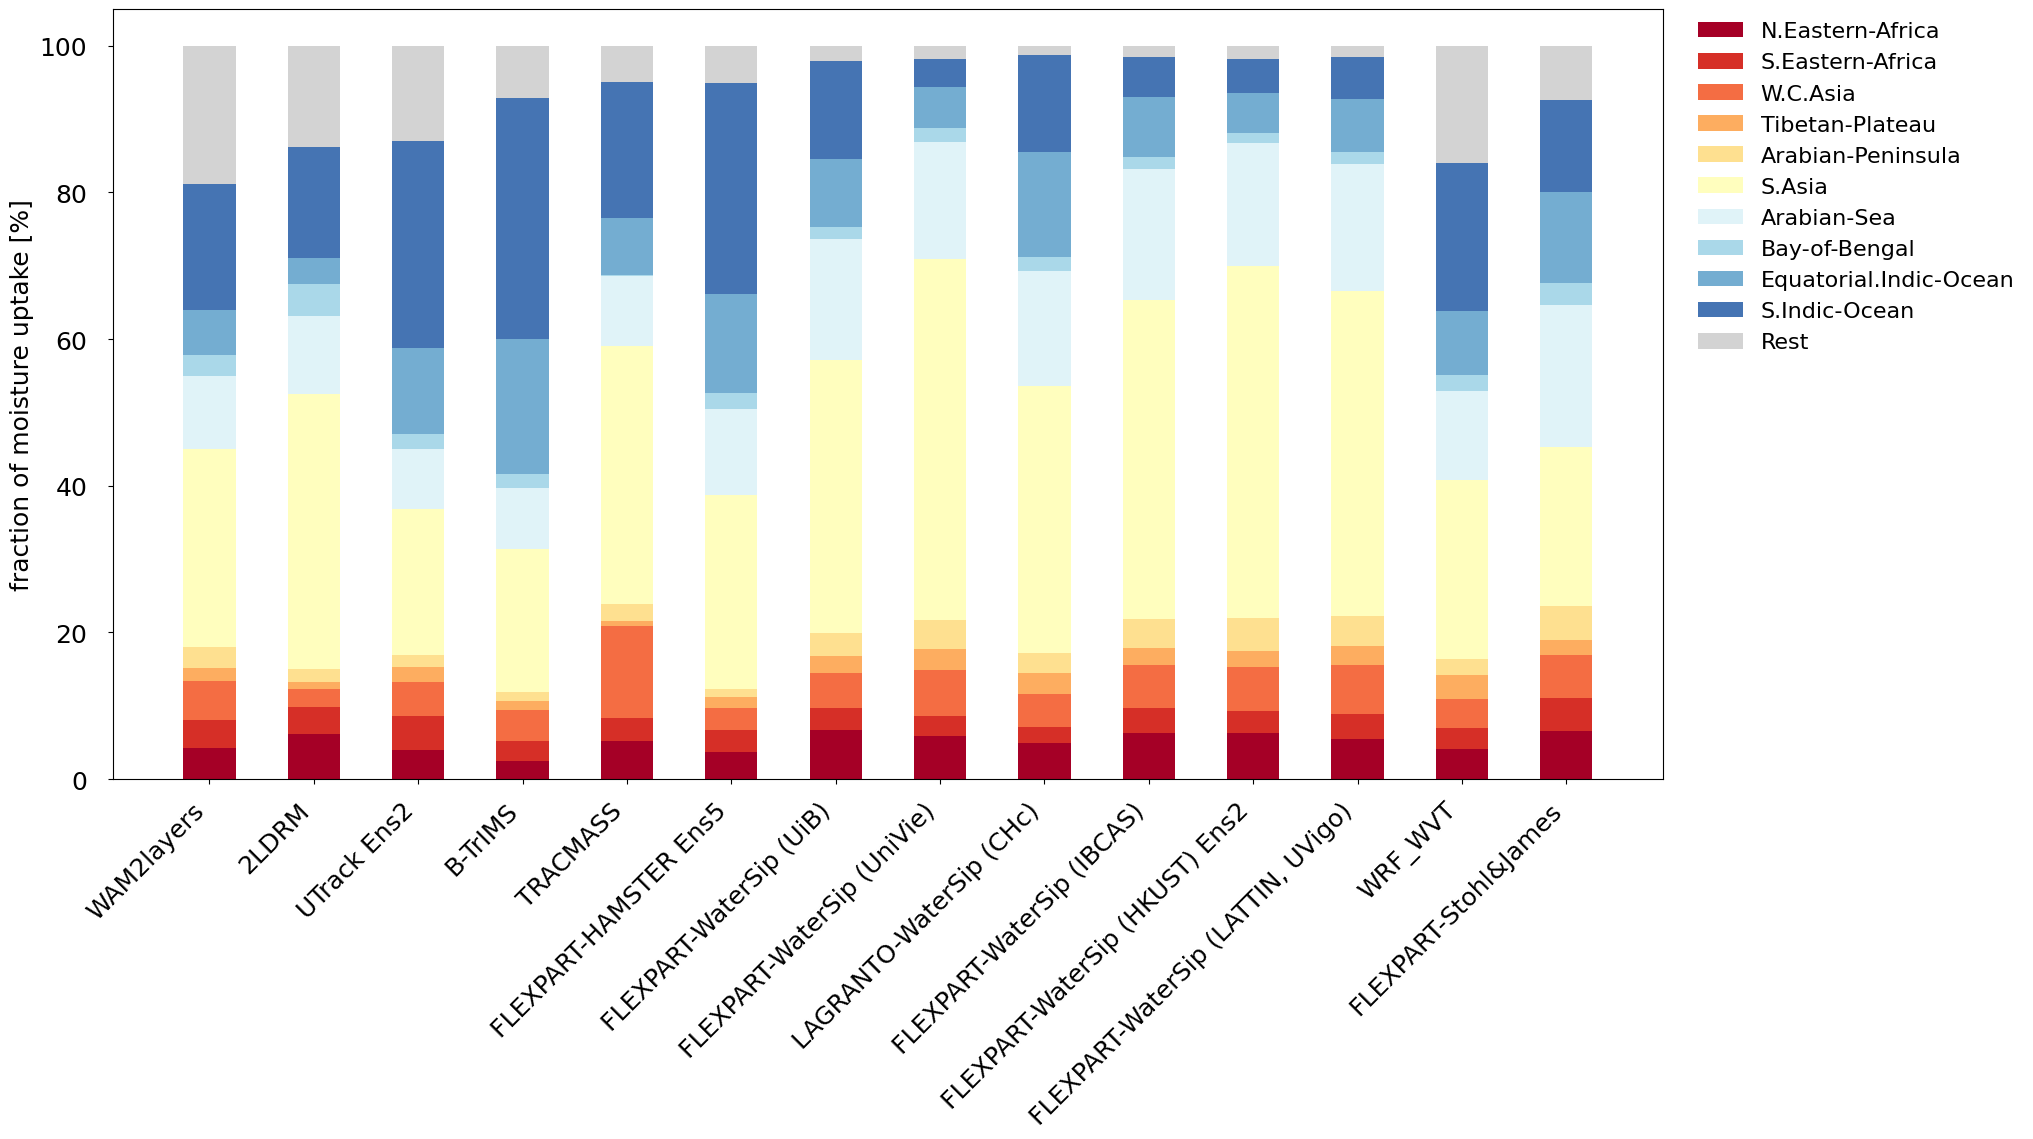

In [10]:
#### plotting absolute regional source attributions ####
plot_abs_regional(
    all_maps_regional,
    csv_wrf_wvt,
    source_sums,
    precip_era5,
    list_reordered,
    figure_path,
    False,
    case,
)


#### plotting fractional regional source attributions ####
plot_frac_regional(
    all_maps_frac_regional, csv_wrf_wvt, list_reordered, figure_path, False, case
)